Importando a Biblioteca Pandas e a Biblioteca matplotlib

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

Atribuindo as planilhas em duas variáveis

In [36]:
arq_console = 'Console.xlsx'
arq_vendas = 'Vendas.xlsx'

Atribuindo as duas planilhas a dois DF com o auxílio do Pandas

In [37]:
df_consoles = pd.read_excel(arq_console)
df_vendas = pd.read_excel(arq_vendas)
#print(df_consoles)
#print(df_vendas)

Fazendo o merge dos dois DFs em um DF Completo usando merge pela coluna ID

In [43]:
df_completo = df_consoles.merge(df_vendas, on='ConsoleID')
print(df_completo)

   ConsoleID  Preco_$        DESCRICAO LANCAMENTO  VENDAS_mi
0          1   439.99    Playstation 5 2020-11-12         30
1          2   469.99    Xbox Series X 2020-11-10         21
2          3   319.99  Nintendo Switch 2017-03-03        129


Criando uma coluna de vendas totais dos consoles

In [44]:
df_completo['TOTAL_VENDAS'] = df_completo['Preco_$'] * df_completo['VENDAS_mi']
print(df_completo)

   ConsoleID  Preco_$        DESCRICAO LANCAMENTO  VENDAS_mi  TOTAL_VENDAS
0          1   439.99    Playstation 5 2020-11-12         30      13199.70
1          2   469.99    Xbox Series X 2020-11-10         21       9869.79
2          3   319.99  Nintendo Switch 2017-03-03        129      41278.71


Exportando o DF completo com a nova coluna para um novo arquivo Excel

In [32]:
df_completo.to_excel('TOTAL_VENDAS.xlsx')

Jogando o DF no gráfico de tipo pizza e mostrando o gráfico

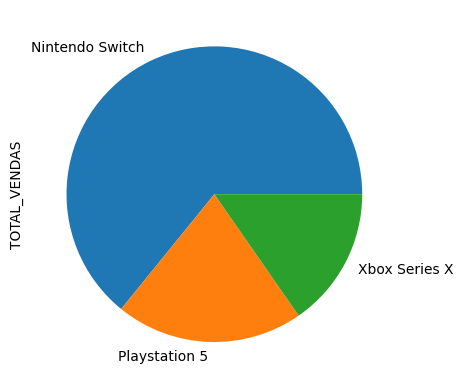

In [45]:
df_completo.TOTAL_VENDAS.groupby(df_completo.DESCRICAO).sum().plot(kind='pie')
plt.show()

Tentando melhorar o gráfico de pizza

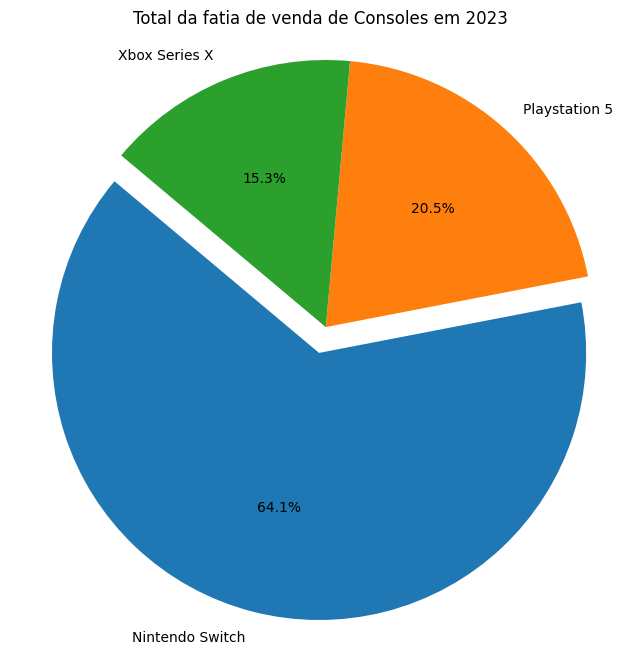

In [48]:
grupo_descricao = df_completo.groupby('DESCRICAO')['TOTAL_VENDAS'].sum()
explode = (0.1,0,0)
plt.figure(figsize=(8,8))
plt.pie(grupo_descricao, labels=grupo_descricao.index, autopct='%1.1f%%', startangle=140, explode=explode)
plt.title('Total da fatia de venda de Consoles em 2023')
plt.axis('equal')
plt.show()